In [1]:
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np

In [2]:
(xtrain, ytrain),(xtest, ytest) = fashion_mnist.load_data()

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D((3,3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

C:\Users\Ajinkya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,882 (1.01 MB)

 Trainable params: 263,882 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer= 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [7]:
model.fit(xtrain.astype(np.float32), ytrain.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7591 - loss: 3.9274 - val_accuracy: 0.8542 - val_loss: 0.4287
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.3419 - val_accuracy: 0.8769 - val_loss: 0.3433
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8904 - loss: 0.2910 - val_accuracy: 0.8802 - val_loss: 0.3296
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.2663 - val_accuracy: 0.8866 - val_loss: 0.3186
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9082 - loss: 0.2465 - val_accuracy: 0.8900 - val_loss: 0.3171


In [8]:
loss, acc = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3410


In [10]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [11]:
pred = model.predict(xtest[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [12]:
print(pred)

[[9.9803401e-08 7.3199708e-08 2.2404835e-07 5.1371035e-07 6.9757609e-09
  3.1305861e-04 2.0074046e-07 4.5487876e-03 6.7241430e-08 9.9513692e-01]]


In [13]:
label = labels[np.argmax(pred)]

In [14]:
print(label)

ankle_boots


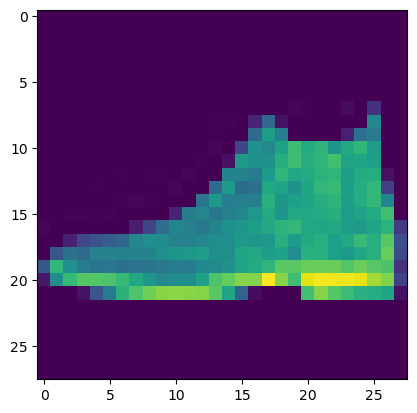

In [17]:
import matplotlib.pyplot as plt
plt.imshow(xtest[:1][0])
plt.show()